In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

<Axes: xlabel='x', ylabel='y'>

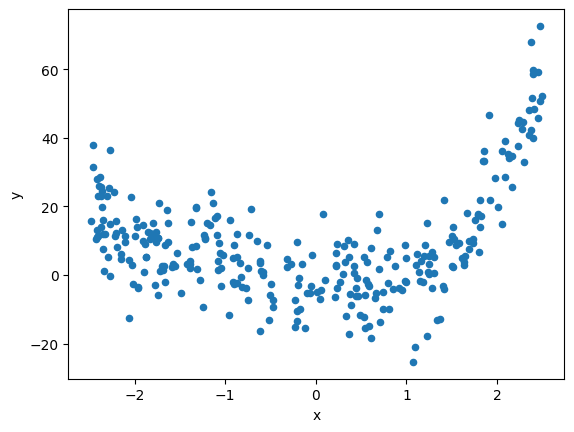

In [2]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

# Klasyfikacja

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error

X_breast_cancer = data_breast_cancer.data[["mean texture", "mean symmetry"]]
y_breast_cancer = data_breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42)

# print("### DEPTH 2 ###")
# tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
# tree_clf.fit(X_train, y_train)
# print(f1_score(y_train, tree_clf.predict(X_train)))
# print(f1_score(y_test, tree_clf.predict(X_test)))

# print("\n### DEPTH 3 ###")
# tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
# tree_clf.fit(X_train, y_train)
# print(f1_score(y_train, tree_clf.predict(X_train)))
# print(f1_score(y_test, tree_clf.predict(X_test)))

# print("\n### DEPTH 4 ###")
# tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
# tree_clf.fit(X_train, y_train)
# print(f1_score(y_train, tree_clf.predict(X_train)))
# print(f1_score(y_test, tree_clf.predict(X_test)))

# print("\n### DEPTH 5 ###")
# tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
# tree_clf.fit(X_train, y_train)
# print(f1_score(y_train, tree_clf.predict(X_train)))
# print(f1_score(y_test, tree_clf.predict(X_test)))

### After depth 3 f1 for test set is getting lower, so I am staying with depth 3

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
print(f1_score(y_train, tree_clf.predict(X_train)))
print(f1_score(y_test, tree_clf.predict(X_test)))

0.8211243611584327
0.7887323943661971


# Generowanie obrazka

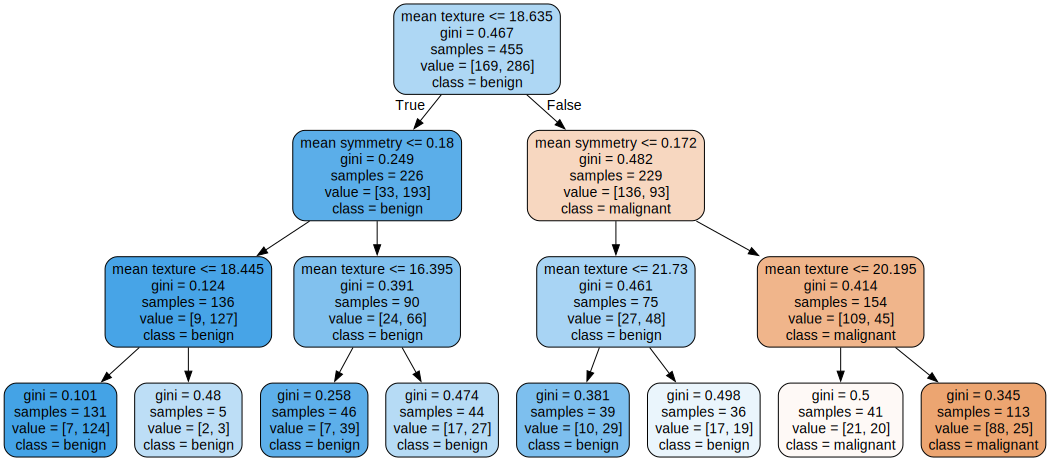

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="bc.dot", feature_names=["mean texture", "mean symmetry"], class_names=data_breast_cancer.target_names, rounded=True, filled=True)

from graphviz import Source

Source.from_file("bc.dot")

In [5]:
#!dot -Tpng {"bc.dot"} -o {"bc.png"}

import subprocess

# Execute the dot command
subprocess.run(["dot", "-Tpng", "bc.dot", "-o", "bc.png"])

CompletedProcess(args=['dot', '-Tpng', 'bc.dot', '-o', 'bc.png'], returncode=0)

# Lista

In [6]:
lst = []
lst.append(tree_clf.get_depth())
lst.append(f1_score(y_train, tree_clf.predict(X_train)))
lst.append(f1_score(y_test, tree_clf.predict(X_test)))
lst.append(accuracy_score(y_train, tree_clf.predict(X_train)))
lst.append(accuracy_score(y_test, tree_clf.predict(X_test)))

import pickle

with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(lst, f)

print(lst)

[3, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


# Zadanie 2

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# print("### DEPTH 2 ###")
# tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
# tree_reg.fit(X_train, y_train)
# print(mean_squared_error(y_train, tree_reg.predict(X_train)))
# print(mean_squared_error(y_test, tree_reg.predict(X_test)))

# print("\n### DEPTH 3 ###")
# tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
# tree_reg.fit(X_train, y_train)
# print(mean_squared_error(y_train, tree_reg.predict(X_train)))
# print(mean_squared_error(y_test, tree_reg.predict(X_test)))

print("\n### DEPTH 4 ###")
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

mse_train = mean_squared_error(y_train, tree_reg.predict(X_train))
mse_test = mean_squared_error(y_test, tree_reg.predict(X_test))

# print("\n### DEPTH 5 ###")
# tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
# tree_reg.fit(X_train, y_train)
# print(mean_squared_error(y_train, tree_reg.predict(X_train)))
# print(mean_squared_error(y_test, tree_reg.predict(X_test)))

# print("\n### DEPTH 6 ###")
# tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
# tree_reg.fit(X_train, y_train)
# print(mean_squared_error(y_train, tree_reg.predict(X_train)))
# print(mean_squared_error(y_test, tree_reg.predict(X_test)))


### DEPTH 4 ###


# WYKRES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


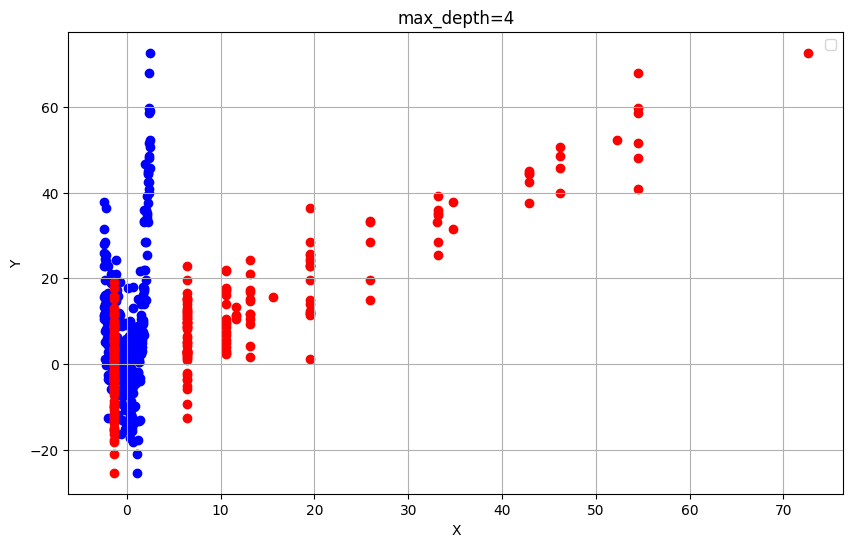

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.scatter(tree_reg.predict(X_train), y_train, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('max_depth=4')
plt.legend()
plt.grid(True)
plt.show()

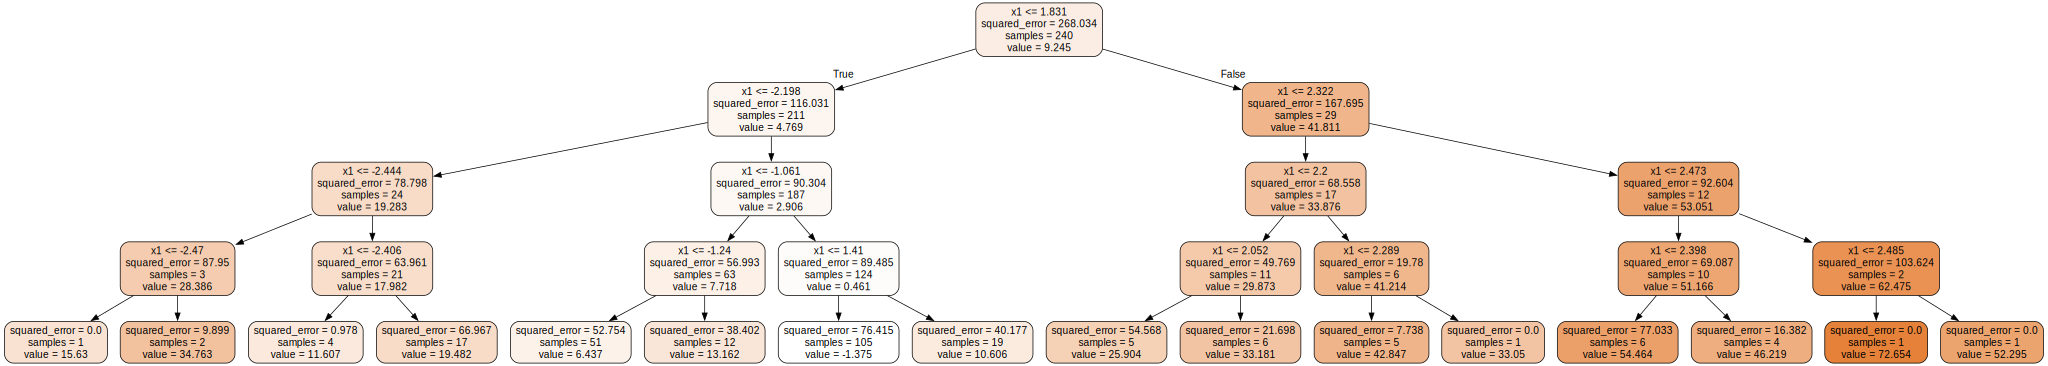

In [9]:
export_graphviz(tree_reg, out_file="reg.dot", feature_names=["x1"], rounded=True, filled=True)
Source.from_file("reg.dot")

In [10]:
# !dot -Tpng {"reg.dot"} -o {"reg.png"}

import subprocess

# Execute the dot command
subprocess.run(["dot", "-Tpng", "reg.dot", "-o", "reg.png"])


CompletedProcess(args=['dot', '-Tpng', 'reg.dot', '-o', 'reg.png'], returncode=0)

In [11]:
lst2 = []
lst2.append(tree_reg.get_depth())
lst2.append(mse_train)
lst2.append(mse_test)

with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(lst2, f)

print(lst2)

[4, 58.62395950504394, 71.00575984778393]
